In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func, Table, Column, Integer, String, Date, Float

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model

inspector = inspect(engine)



In [9]:
meas_columns = inspector.get_columns('measurement')
for c in meas_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
stat_columns = inspector.get_columns('station')
for c in stat_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# View all of the classes that automap found

# reflect the tables

inspector.get_table_names()



['measurement', 'station']

In [12]:
# Save references to table measurement 
Base = automap_base()
Base.prepare(autoload_with=engine)
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [13]:
# Save references to table measurement
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [14]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [15]:
# see the date (column's format)

result = engine.execute('SELECT date FROM measurement order by 1 desc').fetchall()
result

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-20',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-19',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-18',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-17',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-16',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-15',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-14',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-13',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-12',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-11',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08-10',),
 ('2017-08

In [16]:
# solución 2
"""
tbl2 = Table('station', session,
             sa.Column('id', Integer),
             sa.Column('station', String),
             sa.Column('date', Date),
             sa.Column('prcp', Float),
             sa.Column('tobs', Float),
             extend_existing=True)
"""

"\ntbl2 = Table('station', session,\n             sa.Column('id', Integer),\n             sa.Column('station', String),\n             sa.Column('date', Date),\n             sa.Column('prcp', Float),\n             sa.Column('tobs', Float),\n             extend_existing=True)\n"

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
# solucion 1

# preg a Alex porque no puedo meter un parentesis dentro del SQL statement

#last_date = engine.execute('SELECT dt.date(date) FROM measurement').fetchall()

#last_date

# solucion 2
sel = [func.max(func.strftime("%Y-%m-%d",Measurement.date))]

recent_date = session.query(*sel).scalar()
recent_date

'2017-08-23'

In [18]:
# conver str date to a date object

query_date = dt.datetime.strptime(str(recent_date), "%Y-%m-%d").date()
query_date

datetime.date(2017, 8, 23)

In [19]:
# Calculate the date one year from the last date in data set.

query_date = query_date - dt.timedelta(days=365)

In [39]:
result_df['date'] =  pd.to_datetime(result_df['date'], format='%Y-%m-%d')

In [42]:
result_df = result_df.sort_values("date", ascending=True)

In [40]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2230 non-null   datetime64[ns]
 1   precipitation  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB


In [44]:
result_df.dropna().reset_index(drop=True)

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
...,...,...
2016,2017-08-22,0.50
2017,2017-08-23,0.00
2018,2017-08-23,0.08
2019,2017-08-23,0.00


In [45]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2230 non-null   datetime64[ns]
 1   precipitation  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB


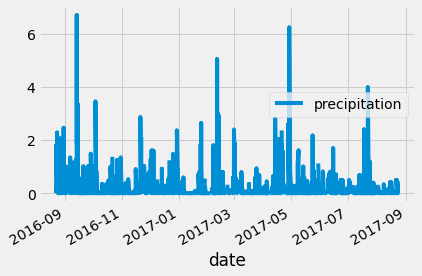

In [47]:
result_df.plot(x="date",y="precipitation") 

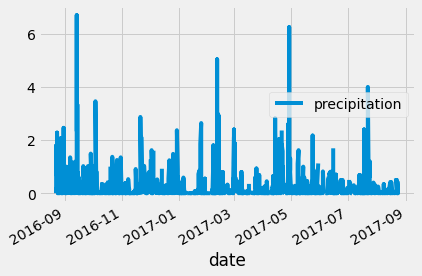

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Perform a query to retrieve the data and precipitation scores

result_Station = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

result_df = pd.DataFrame(result_Station, columns=["date","precipitation"])

result_df['date'] =  pd.to_datetime(result_df['date'], format='%Y-%m-%d')

# Sort the dataframe by date
result_df = result_df.sort_values("date", ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data

result_df.plot(x="date",y="precipitation") 

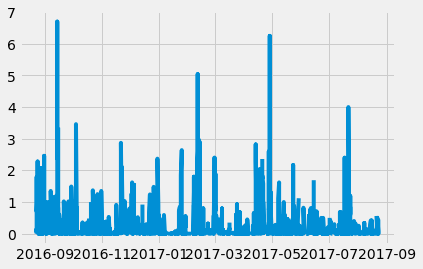

In [41]:
# Use numpy Plotting with Matplotlib to plot the data

fig, ax = plt.subplots()
ax.plot(result_df['date'], result_df['precipitation'])

In [37]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.3+ KB


In [32]:

result_df.head()


,id,station,date,precipitation,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,5091,USC00513117,2016-08-23,0.15,76.0
2,7331,USC00514830,2016-08-23,0.05,80.0
3,8825,USC00517948,2016-08-23,NaN,80.0
4,11851,USC00519523,2016-08-23,0.02,80.0


In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result_df["precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset

sel = [func.count(Station.station)]

stations_query = session.query(*sel).scalar()
stations_query

print(f"The number of stations is ",stations_query)

The number of stations is  9


In [75]:
sel = [Measurement.station, 
       func.count(Measurement.id)]

# Design a query to find the most active stations (i.e. what stations have the most rows?)

stations_first_query = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
stations_first_query 



('USC00519281', 2772)

In [76]:
# List the stations and the counts in descending order.

stations_active_query = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
stations_active_query 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_value = 'USC00519281'

sel = [func.min(Measurement.prcp),
       func.max(Measurement.prcp),
       func.avg(Measurement.prcp)]

station_temp_query = session.query(*sel).filter(Measurement.station==station_value).order_by(func.count(Measurement.id).desc()).all()
station_temp_query

[(0.0, 9.64, 0.2123520923520915)]

In [79]:
sel = [func.max(func.strftime("%Y-%m-%d",Measurement.date))]

recent_date_station = session.query(*sel).filter(Measurement.station==station_value).scalar()
recent_date_station

'2017-08-18'

In [81]:
#query_date = dt.datetime.strptime(str(recent_date_station), "%Y-%m-%d").date()
query_date = query_date - dt.timedelta(days=365)
query_date


datetime.date(2016, 8, 18)

In [83]:
result_Station = session.query(Measurement.date, Measurement.prcp).filter(Measurement.station==station_value).filter(Measurement.date >= query_date).order_by(Measurement.date).all()
result_Station

[('2016-08-18', 0.0),
 ('2016-08-19', 0.31),
 ('2016-08-20', 0.13),
 ('2016-08-21', 0.08),
 ('2016-08-22', 2.32),
 ('2016-08-23', 1.79),
 ('2016-08-24', 2.15),
 ('2016-08-25', 0.06),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.6),
 ('2016-08-29', 0.35),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.24),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.01),
 ('2016-09-03', 0.12),
 ('2016-09-04', 0.14),
 ('2016-09-05', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-08', 0.07),
 ('2016-09-09', 0.16),
 ('2016-09-10', 0.09),
 ('2016-09-11', 0.3),
 ('2016-09-12', 0.31),
 ('2016-09-13', 0.34),
 ('2016-09-14', 2.33),
 ('2016-09-15', 0.83),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.07),
 ('2016-09-19', 0.01),
 ('2016-09-20', 0.22),
 ('2016-09-21', 0.07),
 ('2016-09-22', 0.34),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.01),
 ('2016-09-25', 0.03),
 ('2016-09-26', 0.17),
 ('2016-09-27', 0.17),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.59),
 ('2016-09-30', 

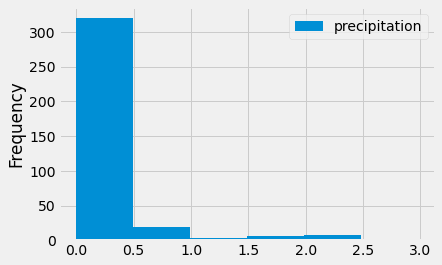

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 

sel = [func.max(func.strftime("%Y-%m-%d",Measurement.date))]

recent_date_station = session.query(*sel).filter(Measurement.station==station_value).scalar()

# convert a date type
query_date = dt.datetime.strptime(str(recent_date_station), "%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.

query_date = query_date - dt.timedelta(days=365)

#

result_Station = session.query(Measurement.prcp).filter(Measurement.station==station_value).filter(Measurement.date >= query_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

result_df = pd.DataFrame(result_Station, columns=["precipitation"])

# plot the results as a histogram

result_df.plot.hist(bins=6) 

# Close session

In [ ]:
# Close Session
session.close()